# **IEOR E4650  Business Analytics**

Project Name:


Team Members: Caterina Almazan (cga2133), Devyani Vij (dv2485), Kimmi Woods (khw2120)



In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from math import radians, sin, cos, sqrt, atan2


Stations = pd.read_csv('WA_EV_Charging_Stations.csv')
Population = pd.read_csv('WA_EV_Population.csv')

In [4]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

## Charging Station Dataset Information

### Description of Columns:
* **Station Name:** The name of the station.
* **Street Address:** The street address of the station's location.
* **City:** The city of the station's location.
* **State:** The two character code for the U.S. state or Canadian province/territory of the station's location.
* **Zip:** The ZIP code (postal code) of the station's location.
* **Expected Date:** For planned stations, the date the station is expected to open or start carrying alternative fuel. For temporarily unavailable stations, the date the station is expected to reopen. This date is estimated.
* **Status Code:** The current status of the station, given as code values as described below:
>*   E: Available
>*   P: Planned
>*   T: Temporarily Unavailable
* **Access Days Time:** Hours of operation for the station.
* **EV Level1 EVSE Num:** For electric stations, the number of Level 1 EVSE ports.
* **EV Level2 EVSE Num:** For electric stations, the number of Level 2 EVSE ports.
* **EV DC Fast Count:** For electric stations, the number of DC Fast EVSE ports.
* **Latitude:** The latitude of the station's address
* **Longitude:** The longitude of the station's address
* **Date Last Confirmed:** The date the station's details were last confirmed.
* **ID:** A unique identifier for this specific station.
* **Open Date:** The date that the station began offering the fuel.
* **Access Code:** A description of who is allowed to access the station
>*   public
>*   private
* **EV Pricing:** For electric stations, information about whether and how much users must pay to use the EVSE port.














In [ ]:
#Initial data cleaning
Stations.drop(columns=['Street Address','City','State','Groups With Access Code','EV Level1 EVSE Num','Geocode Status','Updated At','EV Connector Types','Access Detail Code',\
                       'Facility Type','Restricted Access','Maximum Vehicle Class','EV Network','Date Last Confirmed','Access Code','Owner Type Code'],inplace=True)
Available_Stations = Stations.loc[Stations['Status Code'] == 'E'].copy()
Available_Stations.drop(columns=['Status Code','Expected Date'], inplace=True)
Temp_Unavailable_Stations = Stations.loc[Stations['Status Code']== 'T'].copy()
Temp_Unavailable_Stations.drop(columns=['Status Code'],inplace=True)

In [ ]:
Available_Stations

,Station Name,ZIP,Access Days Time,EV Level2 EVSE Num,EV DC Fast Count,Latitude,Longitude,ID,Open Date,EV Pricing
0,City of Lacey - City Hall Parking,98503,24 hours daily,4.0,NaN,47.044011,-122.822404,33351,1/15/2018,Free; 3 hour maximum charging session
1,Seattle-Tacoma International Airport - General...,98188,24 hours daily; pay lot; Drivers must bring th...,68.0,NaN,47.443377,-122.296229,33717,3/1/2010,Free
2,Avista Corp,99252,24 hours daily; Drivers must bring their own J...,2.0,NaN,47.673347,-117.388933,35620,4/15/2010,Free
3,Steam Plant Parking,99201,24 hours daily,6.0,NaN,47.655792,-117.423664,35621,4/15/2010,Free
4,BELLEVUE BELLEVUE CH 1,98004,24 hours daily,2.0,NaN,47.614744,-122.193162,37181,12/15/2010,NaN
...,...,...,...,...,...,...,...,...,...,...
2359,Tilt49 Realty,98101,24 hours daily,10.0,NaN,47.617025,-122.332218,332307,3/4/2015,NaN
2360,"ARCO - 104th Drive NW, Stanwood",98292,NaN,NaN,6.0,48.241530,-122.374546,332344,4/16/2024,NaN
2361,Zephyr on the Park Apartments,98052,NaN,2.0,NaN,47.675160,-122.125060,332377,4/16/2024,NaN
2362,KIA OF EVERETT KIA OF EVERETT,98204,Mon 7:00am - 7:30pm; Tue 7:00am - 7:30pm; Wed ...,NaN,1.0,47.906310,-122.237592,332471,4/17/2024,NaN


In [ ]:
Ava[Available_Stations.isnull == False]

In [ ]:
Temp_Unavailable_Stations

,Station Name,ZIP,Expected Date,Access Days Time,EV Level2 EVSE Num,EV DC Fast Count,Latitude,Longitude,ID,Open Date,EV Pricing
26,Caplan's Rainbow Parking,98104,12/31/2022,Garage business hours; see the valet for access,2.0,NaN,47.604115,-122.332907,41579,10/1/2011,Free
28,BELLEVUE SBCC #2,98006,1/27/2024,24 hours daily,2.0,NaN,47.568886,-122.145268,42228,11/15/2011,NaN
41,SKAGIT COUNTY ADMIN STATION 2,98273,4/19/2024,24 hours daily,1.0,NaN,48.437569,-122.325494,50210,11/20/2012,NaN
59,AMLI SLU AMLI SLU #1,98109,4/26/2023,24 hours daily,2.0,NaN,47.623130,-122.331442,62796,8/6/2014,NaN
88,HAMPTON INN WEST BACK,98004,10/8/2023,24 hours daily,2.0,NaN,47.611711,-122.187292,66594,4/2/2015,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2210,HYSHOP SHOP STATION1,98409,3/19/2024,24 hours daily,1.0,NaN,47.188135,-122.482901,321389,12/5/2023,NaN
2279,Modera Overlake,98052,2/16/2024,24 hours daily,1.0,NaN,47.628853,-122.136010,328536,2/14/2024,NaN
2326,AMZ SEA42 - 34,98119,4/17/2024,24 hours daily,2.0,NaN,47.616286,-122.338810,330601,3/15/2024,NaN
2352,AMZ SEA24 - 10,98109,4/18/2024,24 hours daily,2.0,NaN,47.623802,-122.335507,331946,4/9/2024,NaN


## Population Dataset Information:

### Description of Columns:
* **Postal Code:** ZIP code where the car is registered to. ZIP codes are primarily used for mail delivery by the U.S. Postal Service, but they can be quite large and may not accurately represent localized patterns.
* **Model Year:** a year in which the car was manufactured.
* **Make:** Name of Company/Car Brand.
* **Model:** Name of Car Product or a Line of Cars.
* **Electric Vehicle Type:** 2 options here:
>* plug-in hybrid electric vehicles (PHEV): 36,507 entries with this option. all of these will have a much lower electric range due to the hybrid feature of these cars.
>* battery electric vehicles (BEV): 130,293 entries with this option. fully electric vehicles with no alternate, so these will have higher electric ranges.
* **Electric Range:** Full range in miles the car can go on a single charge.
* **DOL Vehicle ID:** DOL Vehicle ID. A unique identification number for each vehicle is present in the Transactions dataset. Transactions done on the same vehicle will have the same DOL Vehicle ID.
* **Vehicle Location:** Written in the form of POINT(longitude lattitude), the exact location the car is registered to.
* **2020 Census Tract:**  Census tracts are geographic areas defined by the U.S. Census Bureau and good for statistical and demographic analysis.


In [ ]:
#Initial data cleaning:
Population['MMY'] = Population['Make'] + ' ' + Population['Model'] + ' ' + Population['Model Year'].astype(str)
Population = Population[Population['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)']  #deleting hybrids
mask = Population['Vehicle Location'].isnull()
Population = Population[~mask]
Population[['longitude', 'latitude']] = Population['Vehicle Location'].str.extract(r'POINT \(([-+]?\d+\.\d+) ([-+]?\d+\.\d+)\)')
Population['longitude'] = pd.to_numeric(Population['longitude'])
Population['latitude'] = pd.to_numeric(Population['latitude'])
Population.drop(columns=['VIN (1-10)','County','City','Electric Vehicle Type','Make','Model','Model Year','Electric Vehicle Type','Electric Utility',\
                         'Vehicle Location','Clean Alternative Fuel Vehicle (CAFV) Eligibility','Legislative District'],inplace=True)

,Postal Code,Electric Range,DOL Vehicle ID,2020 Census Tract,MMY,longitude,latitude
0,98902.0,87,1593721,5.307700e+10,FIAT 500 2014,-120.524012,46.597394
1,98513.0,200,257167501,5.306701e+10,TESLA MODEL X 2017,-122.817545,46.988760
3,98012.0,0,260084653,5.306105e+10,RIVIAN R1S 2023,-122.187300,47.820245
4,98031.0,322,253771913,5.303303e+10,TESLA MODEL 3 2020,-122.201252,47.393181
7,98370.0,238,214494213,5.303509e+10,CHEVROLET BOLT EV 2017,-122.641770,47.737525
...,...,...,...,...,...,...,...
166793,98033.0,0,199014224,5.303302e+10,PORSCHE TAYCAN 2022,-122.202640,47.678500
166794,98925.0,0,212130950,5.303798e+10,KIA EV6 2022,-121.176163,47.241060
166796,98074.0,0,148715479,5.303303e+10,TESLA MODEL Y 2021,-122.031327,47.628578
166797,98275.0,0,220504406,5.306104e+10,TESLA MODEL Y 2022,-122.299965,47.941710


We realized that there are 124 different Make / Model / Model Year of cars will missing data for the electric range. We had ChatGPT help us find these values.

In [ ]:
Unknown_ER = Population[Population['Electric Range'] == 0][['MMY']]
Unknown_ER = Unknown_ER.drop_duplicates()
Unknown_ER

,MMY
3,RIVIAN R1S 2023
10,TESLA MODEL Y 2023
21,RIVIAN R1T 2022
32,TESLA MODEL Y 2022
110,TESLA MODEL 3 2023
...,...
64026,AUDI SQ8 2024
66640,CHEVROLET SILVERADO EV 2024
85451,MERCEDES-BENZ EQE-CLASS SEDAN 2024
102268,JAGUAR I-PACE 2024


In [ ]:
#this is a dict with the electric ranges we found using chatGPT
Filling_Missing_ER = {
    'RIVIAN R1S 2023': 316,
    'TESLA MODEL Y 2023': 330,
    'RIVIAN R1T 2022': 314,
    'TESLA MODEL Y 2022': 330,
    'TESLA MODEL 3 2023': 358,
    'TESLA MODEL 3 2022': 358,
    'NISSAN LEAF 2021': 149,
    'TESLA MODEL Y 2021': 326,
    'FORD TRANSIT 2022': 126,
    'FORD MUSTANG MACH-E 2023': 314,
    'HYUNDAI KONA ELECTRIC 2023': 258,
    'VOLKSWAGEN ID.4 2023': 260,
    'VOLKSWAGEN ID.4 2021': 260,
    'SUBARU SOLTERRA 2023': 228,
    'RIVIAN R1T 2023': 314,
    'FORD MUSTANG MACH-E 2022': 314,
    'LUCID AIR 2022': 520,
    'KIA EV6 2022': 310,
    'TESLA MODEL S 2023': 405,
    'POLESTAR PS2 2023': 292,
    'AUDI Q8 2024': 280,
    'NISSAN LEAF 2023': 226,
    'CHEVROLET BOLT EUV 2023': 247,
    'AUDI E-TRON 2023': 222,
    'HYUNDAI IONIQ 5 2023': 303,
    'TESLA MODEL 3 2021': 353,
    'KIA EV6 2023': 310,
    'FORD F-150 2023': 320,
    'AUDI E-TRON 2022': 222,
    'MERCEDES-BENZ EQS-CLASS SEDAN 2022': 350,
    'VOLVO XC40 2022': 223,
    'TESLA MODEL X 2023': 348,
    'TESLA MODEL X 2022': 348,
    'CHEVROLET BOLT EV 2023': 259,
    'VOLVO C40 2023': 226,
    'BMW IX 2024': 324,
    'LEXUS RZ 450E 2023': 225,
    'TESLA MODEL S 2021': 405,
    'CHEVROLET BOLT EV 2022': 259,
    'TOYOTA BZ4X 2023': 252,
    'PORSCHE TAYCAN 2023': 227,
    'KIA NIRO 2023': 239,
    'BMW I4 2023': 301,
    'MINI HARDTOP 2022': 114,
    'RIVIAN R1S 2022': 316,
    'HYUNDAI IONIQ 6 2023': 310,
    'KIA NIRO 2022': 239,
    'NISSAN LEAF 2022': 226,
    'MERCEDES-BENZ EQB-CLASS 2023': 260,
    'AUDI Q4 2023': 241,
    'PORSCHE TAYCAN 2021': 227,
    'HYUNDAI KONA ELECTRIC 2022': 258,
    'MERCEDES-BENZ EQS-CLASS SUV 2023': 350,
    'MERCEDES-BENZ EQS-CLASS SEDAN 2023': 350,
    'VOLKSWAGEN ID.4 2022': 260,
    'HYUNDAI IONIQ 5 2024': 303,
    'FORD F-150 2022': 320,
    'KIA NIRO 2021': 239,
    'HYUNDAI KONA ELECTRIC 2021': 258,
    'AUDI E-TRON SPORTBACK 2022': 218,
    'CHEVROLET BOLT EV 2021': 259,
    'MERCEDES-BENZ EQE-CLASS SEDAN 2023': 410,
    'NISSAN ARIYA 2023': 300,
    'BMW I4 2024': 300,  # Estimate as specific 2024 details may vary
    'HYUNDAI IONIQ 5 2022': 303,
    'VOLVO XC40 2023': 223,
    'MERCEDES-BENZ EQB-CLASS 2022': 260,
    'NISSAN LEAF 2024': 150,  # Lower range for standard model, higher ranges available
    'AUDI E-TRON 2021': 222,
    'FORD TRANSIT 2023': 126,  # For the all-electric version
    'AUDI E-TRON GT 2022': 238,
    'POLESTAR PS2 2022': 292,
    'KIA NIRO 2024': 239,  # Estimated based on previous models
    'MERCEDES-BENZ EQE-CLASS SUV 2023': 350,  # Estimate as specifics may vary
    'CADILLAC LYRIQ 2024': 312,
    'MINI HARDTOP 2024': 114,  # Estimated based on the previous model year
    'GENESIS GV60 2023': 248,
    'FORD MUSTANG MACH-E 2021': 305,
    'LUCID AIR 2023': 520,
    'VOLVO XC40 2021': 208,
    'GENESIS G80 2023': 282,  # This is an estimation as specifics may not be widely available.
    'PORSCHE TAYCAN 2022': 227,
    'AUDI E-TRON GT 2023': 238,
    'BMW I4 2022': 301,
    'TESLA MODEL S 2022': 405,
    'VOLVO C40 2022': 226,
    'CADILLAC LYRIQ 2023': 312,
    'MINI HARDTOP 2023': 114,
    'AUDI RS E-TRON GT 2022': 232,
    'AUDI E-TRON SPORTBACK 2021': 218,
    'BMW IX 2023': 324,
    'AUDI Q4 2022': 241,
    'PORSCHE TAYCAN 2024': 227,  # Assuming similar range as previous years
    'AUDI RS E-TRON GT 2023': 232,
    'POLESTAR PS2 2024': 292,  # Estimate based on previous model years
    'NISSAN LEAF 2020': 150,
    'TESLA MODEL X 2021': 348,
    'BMW IX 2022': 324,
    'GENESIS GV70 2024': 280,  # Estimate as specific details may vary
    'JAGUAR I-PACE 2022': 234,
    'FISKER OCEAN 2023': 350,
    'BMW I3 2021': 153,
    'MERCEDES-BENZ EQE-CLASS SUV 2024': 350,  # Estimated based on the sedan model
    'RIVIAN EDV 2023': 150,  # Estimate, specific range depends on configuration
    'HYUNDAI IONIQ 2021': 170,
    'KIA EV6 2024': 310,
    'GMC HUMMER EV PICKUP 2024': 329,
    'AUDI Q4 2024': 241,  # Assuming similar to 2023 model
    'VOLVO XC40 2024': 223,  # Assuming similar to 2023 model
    'BMW I5 2024': 300,  # Estimate based on the i4 model
    'CHEVROLET BLAZER EV 2024': 320,  # Estimated based on announcements
    'HYUNDAI IONIQ 6 2024': 300,  # Estimated based on the Ioniq 5
    'BMW I7 2024': 300,  # Estimate based on BMW's electric lineup
    'MAZDA MX-30 2022': 100,
    'JAGUAR I-PACE 2023': 234,
    'GENESIS GV70 2023': 280,  # Estimated based on similar models
    'KIA SOUL EV 2019': 111,
    'RIVIAN EDV 2022': 150,  # Estimate, specific range depends on configuration
    'KIA EV9 2024': 300,  # Estimated based on EV6 and expected improvements
    'AUDI SQ8 2024': 280,  # Estimated, assuming an electric version exists
    'CHEVROLET SILVERADO EV 2024': 400,  # Estimated based on announcements
    'MERCEDES-BENZ EQE-CLASS SEDAN 2024': 410,
    'JAGUAR I-PACE 2024': 234,  # Assuming similar to 2023 model
    'GENESIS GV60 2024': 248  # Assuming similar to 2023 model
}

In [ ]:
Unknown_ER['Electric Range'] = Unknown_ER['MMY'].map(Filling_Missing_ER)
Population = Population.merge(Unknown_ER, on=['MMY'], how='left', suffixes=('_old', ''))
Population['Electric Range'] = Population['Electric Range'].fillna(Population['Electric Range_old'])
Population.drop(columns=['Electric Range_old'], inplace=True)
Population

,Postal Code,DOL Vehicle ID,2020 Census Tract,MMY,longitude,latitude,Electric Range
0,98902.0,1593721,5.307700e+10,FIAT 500 2014,-120.524012,46.597394,87.0
1,98513.0,257167501,5.306701e+10,TESLA MODEL X 2017,-122.817545,46.988760,200.0
2,98012.0,260084653,5.306105e+10,RIVIAN R1S 2023,-122.187300,47.820245,316.0
3,98031.0,253771913,5.303303e+10,TESLA MODEL 3 2020,-122.201252,47.393181,322.0
4,98370.0,214494213,5.303509e+10,CHEVROLET BOLT EV 2017,-122.641770,47.737525,238.0
...,...,...,...,...,...,...,...
130281,98033.0,199014224,5.303302e+10,PORSCHE TAYCAN 2022,-122.202640,47.678500,227.0
130282,98925.0,212130950,5.303798e+10,KIA EV6 2022,-121.176163,47.241060,310.0
130283,98074.0,148715479,5.303303e+10,TESLA MODEL Y 2021,-122.031327,47.628578,326.0
130284,98275.0,220504406,5.306104e+10,TESLA MODEL Y 2022,-122.299965,47.941710,330.0


# **Model:**

In order to model this, we need to do a couple of things:
1. Assign each row of the Population dataset to the closest charging station in the Available_Stations dataset.(minimizing distance / clustering)
2. Charging Demand: Come up with assumptions on the demand based on EV registrations / electric range / etc for if each station can actually service all the cars assigned to it.


Green = Charging Station

Red = EV Cars

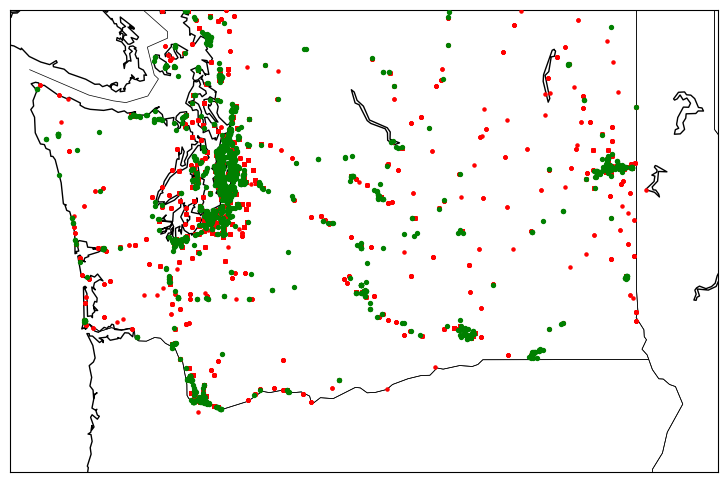

In [ ]:
plt.figure(figsize=(10, 6))
m = Basemap(projection='merc', llcrnrlat=45, urcrnrlat=49, llcrnrlon=-125, urcrnrlon=-116, resolution='i')
m.drawcoastlines()
m.drawcountries()
m.drawstates()

# Plot latitude and longitude points
x1, y1 = m(Population['longitude'], Population['latitude'])
m.scatter(x1, y1, marker='o', color='r', zorder=5, s=5)

x2, y2 = m(Available_Stations['Longitude'], Available_Stations['Latitude'])
m.scatter(x2, y2, marker='o', color='g', zorder=5, s=8)

plt.show()

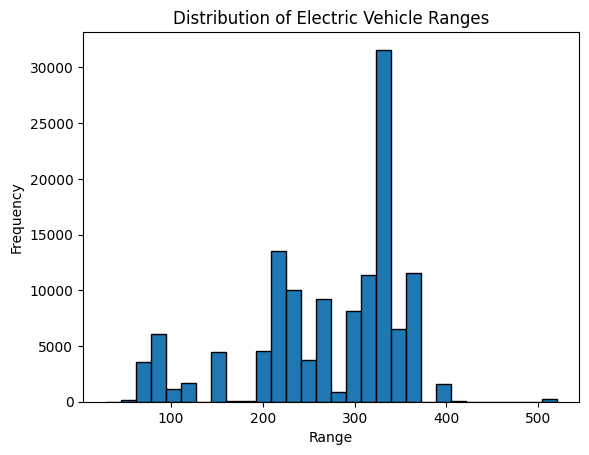

In [ ]:
plt.hist(Population["Electric Range"], bins=30, edgecolor='black')
plt.xlabel('Range')
plt.ylabel('Frequency')
plt.title('Distribution of Electric Vehicle Ranges')
plt.show()

K-means method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

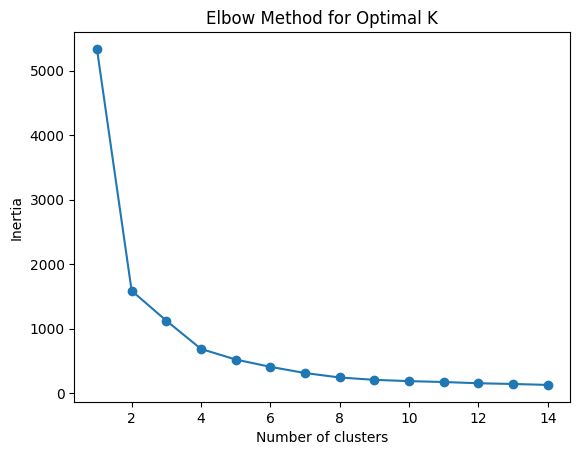

In [ ]:
Stations_Loc = pd.concat([Available_Stations['Longitude'], Available_Stations['Latitude']], axis=1)

inertia = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(Stations_Loc)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 15), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

#going with 9

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

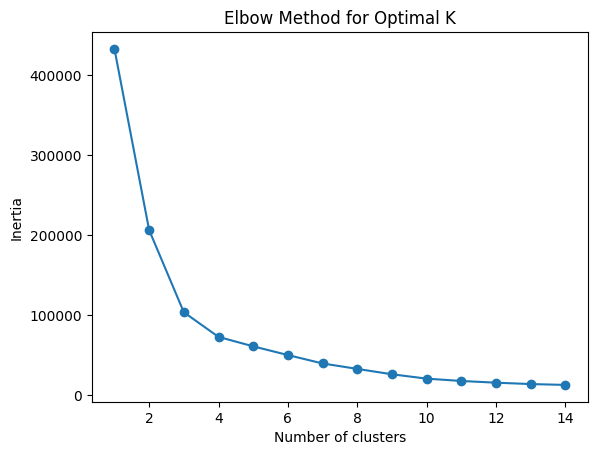

In [ ]:
Population_Loc = pd.concat([Population['longitude'], Population['latitude']], axis=1)

inertia = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(Population_Loc)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 15), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

#going with 12

In [ ]:
kmeans = KMeans(n_clusters=9)  # Set the number of clusters
kmeans.fit(Stations_Loc)

plt.scatter(Stations_Loc[:, 0], Stations_Loc[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Charger Clusters')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


InvalidIndexError: (slice(None, None, None), 0)

Distance between cars and charging stations

Distance between charging stations?

In [ ]:
#manhattan distance approximates driving distance, imagining you're driving on city blocks. works for short distances
def manhattan_distance(lat1, lon1, lat2, lon2):
    try:
      lat1, lon1, lat2, lon2 = map(float, [lat1, lon1, lat2, lon2])
      return abs(lat1 - lat2) + abs(lon1 - lon2)
    except ValueError:
      return float('inf')


distances = []
for index, row in Population_Loc.iterrows():
    car_lat, car_lon = row['latitude'], row['longitude']
    print(car_lon, car_lat)
    # Calculate Manhattan distance to each charger and find the minimum distance
    min_distance = min(manhattan_distance(car_lat, car_lon, row[Longtidue]], row['Latitude']) for index,row in Stations_Loc.iterrows())
    print(min_distance)
    distances.append(min_distance)

#Population['NearestChargerDistance'] = distances
#Population

l o
inf
l a
inf


In [ ]:
for index, row in Population_Loc.head(10).iterrows():
    print(row['latitude'], row['longitude'])

Streaming output truncated to the last 5000 lines.
47.77279 -122.382425
47.71124 -122.209285
47.43473 -122.29179
45.7010427 -122.6483953
47.71124 -122.209285
47.659185 -122.34301
47.624515 -122.16085
47.43473 -122.29179
47.6293323 -122.5235781
45.77945 -122.53218
45.630465 -122.675975
47.6785 -122.20264
47.71558 -122.296385
47.6245 -122.11832
47.67668 -122.12302
47.43876 -122.197
47.465925 -122.341345
47.9156409 -122.2247757
47.505655 -122.355145
47.665978 -122.668076
47.63046 -122.363815
47.71124 -122.209285
45.59009 -122.405565
47.6293323 -122.5235781
47.77279 -122.382425
47.46233 -122.32863
47.71558 -122.296385
47.624515 -122.16085
45.67862 -122.5146473
45.630465 -122.675975
47.505655 -122.355145
47.599975 -122.147385
47.67668 -122.12302
47.46233 -122.32863
47.61385 -122.201905
47.62523 -122.30764
47.6785 -122.20264
47.665978 -122.668076
45.6228 -122.51692
47.32309 -122.31327
47.61385 -122.201905
47.67668 -122.12302
45.923065 -122.73125
47.67668 -122.12302
47.534065 -122.03646
47.66

KeyboardInterrupt: 

In [ ]:
Population_Loc

,longitude,latitude
0,-120.524012,46.597394
1,-122.817545,46.988760
2,-122.187300,47.820245
3,-122.201252,47.393181
4,-122.641770,47.737525
...,...,...
130281,-122.202640,47.678500
130282,-121.176163,47.241060
130283,-122.031327,47.628578
130284,-122.299965,47.941710
